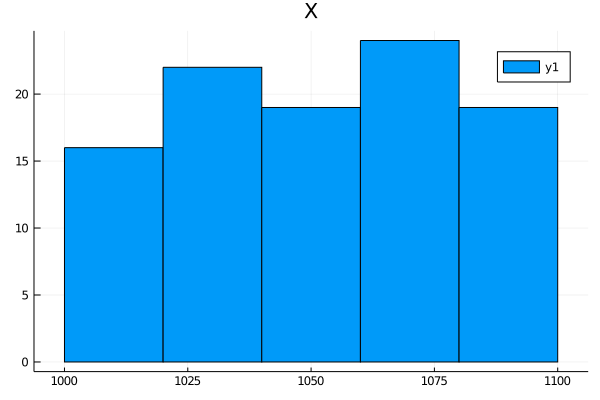

In [42]:
using Plots

range = 1000
total_pts = 100
m = 0.2
X = 1000 .+ (rand(total_pts)) * 100

# add noise
Y = X .* m .+ randn(total_pts)

histogram(X, title="X")

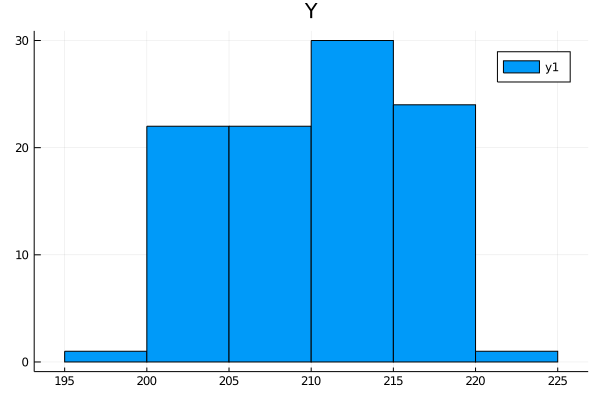

In [43]:
histogram(Y, title="Y")

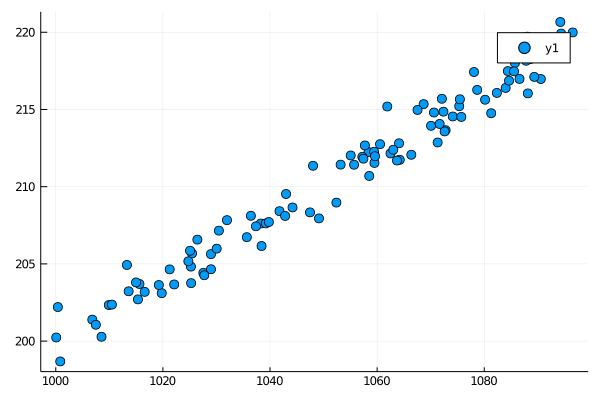

In [44]:
scatter(X, Y, marker = 5)

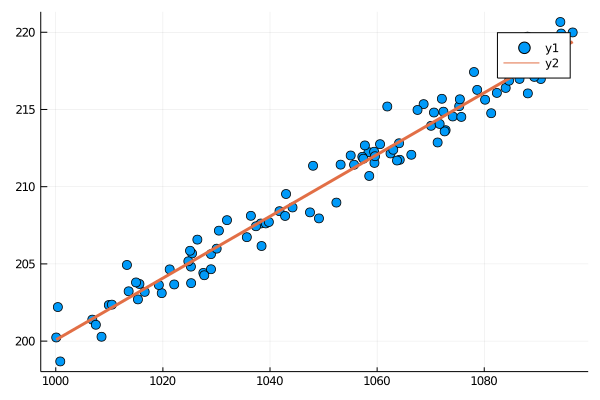

In [45]:
function lm_closed(X, Y)
  # ': denotes the transpose of the matrix, while inv gives us the inverse
  β = inv(X' * X) * X' * Y
  return(β)
end
β_new = lm_closed(X,Y)
plot!(x -> x * β_new, X, line = 3)

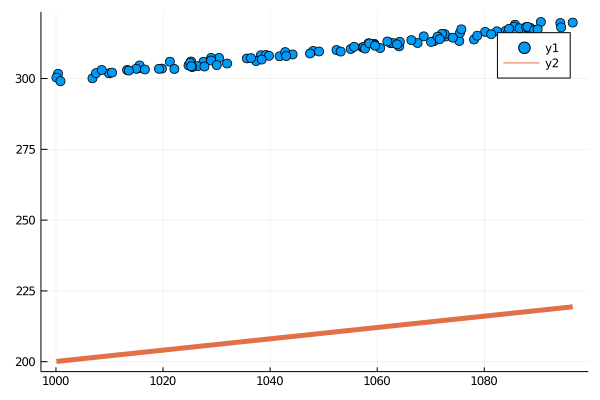

In [46]:
Y2 = X .* 0.2 .+ randn(size(X,1)) .+ 100
scatter(X, Y2, marker = 5)

β_attempt = lm_closed(X,Y)
plot!(x -> x * β_attempt, X, line = 5)

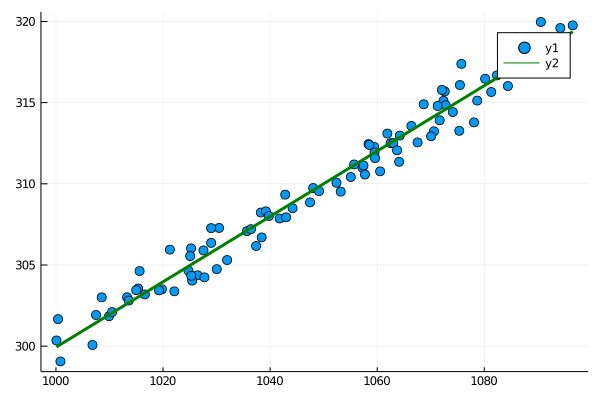

In [47]:
function lm_closed_bias(X, Y)
  n_obs = size(X, 1)

  # here ones() gives a vector of length n_obs filled with floating point 1.0s
  # we concatonate this to X horizontally with hcat.
  # I.e. stick them together. The first column is 1s and the
  # rest are the columns of X
  X = hcat(ones(Float64, n_obs), X)

  β = inv(X' * X) * X' * Y
  return(β)
end

β_bias = lm_closed_bias(X, Y2)
scatter(X, Y2, marker = 5)
plot!(x -> β_bias[1] + x * β_bias[2], X, line = ("green", 3))